# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import statsmodels.api as sm
from scipy.stats import shapiro, anderson
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.options.display.float_format = '{:.2f}'.format

# Loading and Exploring Processed Data

In [4]:
processed_df = pd.read_csv('../data/processed/lisbon_houses_processed.csv')
processed_df.head()

,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price,PricePerBedroom,BathroomToBedroom,AreaUtilizationRatio,PropertyCategory
0,Used,Homes,Apartment,3,1,76.00,152.00,0,38.78,-9.12,Olivais,198000,66000.00,0.33,0.50,Homes_Apartment
1,Used,Homes,Duplex,5,3,190.00,380.00,0,38.71,-9.18,Alcantara,1270000,254000.00,0.60,0.50,Homes_Duplex
2,Used,Homes,Apartment,1,1,26.00,52.00,0,38.71,-9.16,Estrela,140000,140000.00,1.00,0.50,Homes_Apartment
3,Used,Homes,Apartment,5,4,185.00,370.00,0,38.75,-9.16,Sao Domingos de Benfica,995000,199000.00,0.80,0.50,Homes_Apartment
4,Used,Homes,Apartment,7,1,150.00,300.00,0,38.73,-9.13,Arroios,570000,81428.57,0.14,0.50,Homes_Apartment


In [5]:
# Check data info
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Condition             246 non-null    object 
 1   PropertyType          246 non-null    object 
 2   PropertySubType       246 non-null    object 
 3   Bedrooms              246 non-null    int64  
 4   Bathrooms             246 non-null    int64  
 5   AreaNet               246 non-null    float64
 6   AreaGross             246 non-null    float64
 7   Parking               246 non-null    int64  
 8   Latitude              246 non-null    float64
 9   Longitude             246 non-null    float64
 10  Parish                246 non-null    object 
 11  Price                 246 non-null    int64  
 12  PricePerBedroom       246 non-null    float64
 13  BathroomToBedroom     246 non-null    float64
 14  AreaUtilizationRatio  246 non-null    float64
 15  PropertyCategory      2

In [6]:
# Get statistical summary
processed_df.describe(include='all')

,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price,PricePerBedroom,BathroomToBedroom,AreaUtilizationRatio,PropertyCategory
count,246,246,246,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246,246.00,246.00,246.00,246.00,246
unique,4,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,8
top,New,Homes,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marvila,NaN,NaN,NaN,NaN,Homes_Apartment
freq,96,239,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,NaN,NaN,NaN,226
mean,NaN,NaN,NaN,2.49,1.85,107.51,215.02,0.15,38.73,-9.14,NaN,531888.95,232769.95,0.79,0.50,NaN
std,NaN,NaN,NaN,1.35,1.03,57.13,114.27,0.50,0.02,0.03,NaN,330770.54,138537.99,0.31,0.00,NaN
min,NaN,NaN,NaN,0.00,0.00,23.00,46.00,0.00,38.70,-9.22,NaN,85000.00,43333.33,0.00,0.50,NaN
25%,NaN,NaN,NaN,2.00,1.00,64.25,128.50,0.00,38.72,-9.16,NaN,271250.00,125000.00,0.50,0.50,NaN
50%,NaN,NaN,NaN,2.00,2.00,90.00,180.00,0.00,38.73,-9.14,NaN,450000.00,213500.00,0.83,0.50,NaN
75%,NaN,NaN,NaN,3.00,2.00,145.00,290.00,0.00,38.75,-9.11,NaN,715000.00,325000.00,1.00,0.50,NaN


# Data Visualization

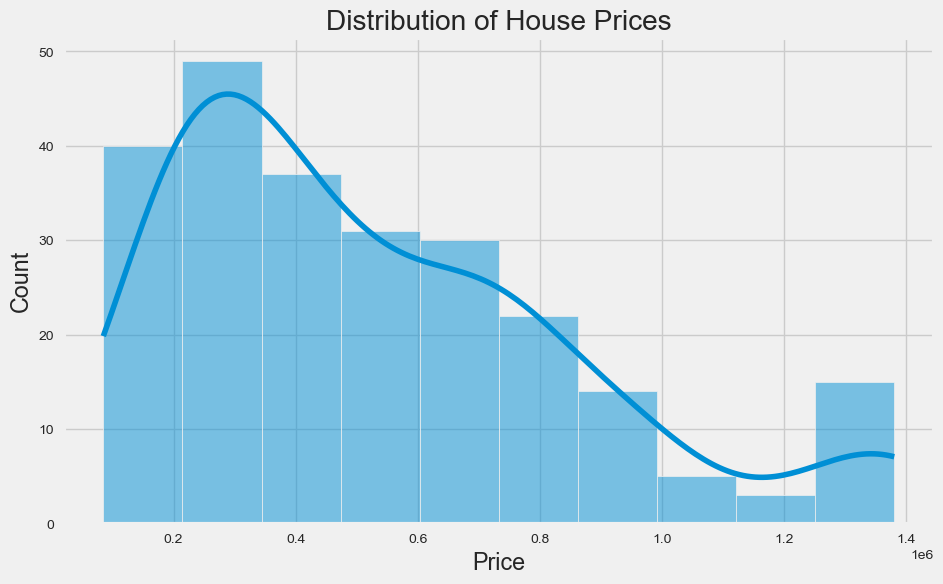

In [7]:
# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(processed_df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

# Image 1: Distribution of House Prices
This histogram shows the distribution of house prices in Lisbon with the following key insights:

* The distribution is right-skewed, with most properties concentrated in the lower price ranges (200,000€ to 600,000€)
* There appears to be a peak around 300,000€, indicating the most common price point
* There's a notable "tail" extending toward higher prices, with a small cluster of luxury properties around 1.3-1.4 million euros
* The long right tail suggests significant price disparity in the Lisbon housing market
* The distribution is not normal, which may impact statistical modeling approaches and might suggest a need for log transformation when building predictive models

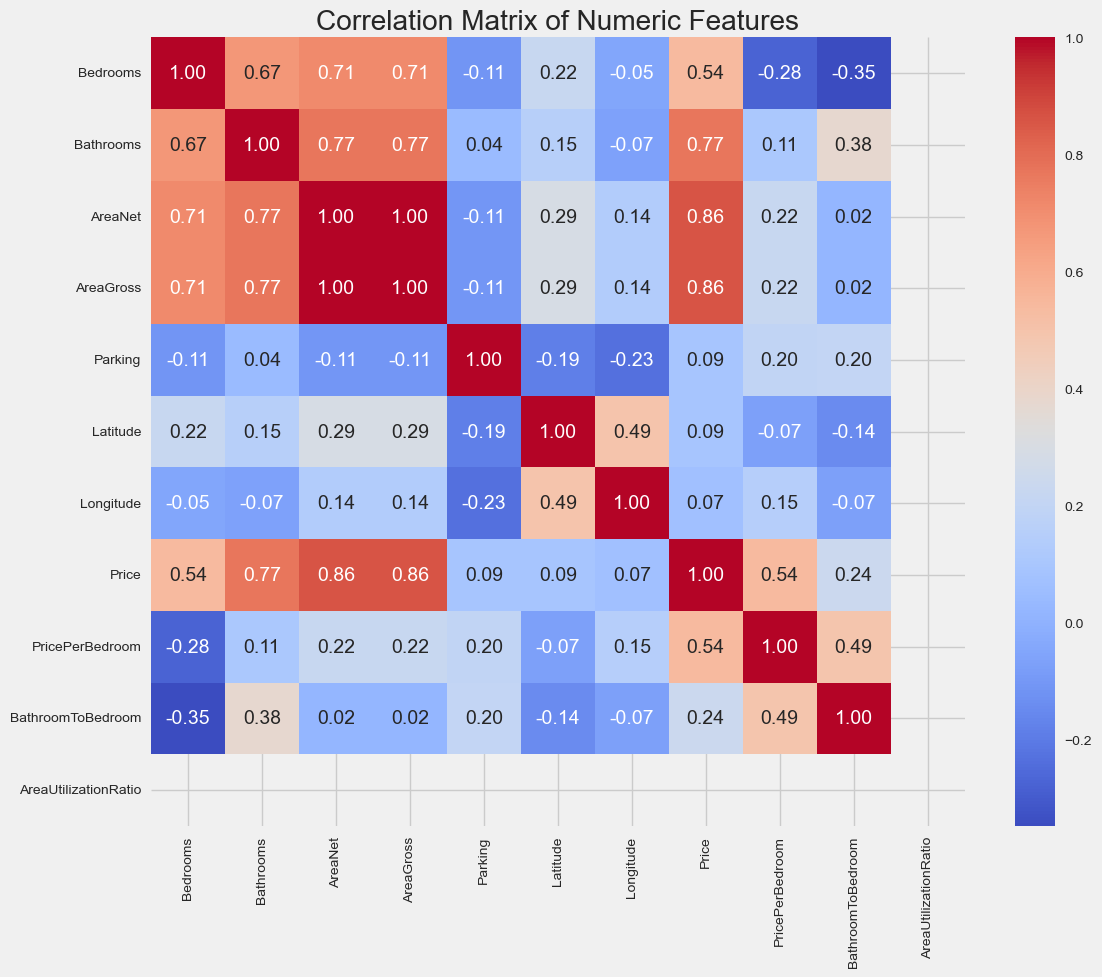

In [8]:
# Correlation matrix for numeric features
numeric_cols = processed_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = processed_df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Image 2: Correlation Matrix of Numeric Features

* **Area measurements** (AreaNet and AreaGross) show the strongest correlation with Price (0.86), making them the most powerful individual predictors
* **Bathrooms** correlate strongly with Price (0.77), slightly more than Bedrooms (0.54)
* **AreaNet and AreaGross** are perfectly correlated (1.0), suggesting one is derived from the other using a fixed ratio
* **Bedrooms and Bathrooms** show moderate correlation (0.67), as expected in residential properties
* **Geographic coordinates** (Latitude and Longitude) show minimal correlation with Price (0.09 and 0.07), suggesting location effects may be non-linear or neighborhood-specific
* **Parking** has negligible correlation with Price (0.09), contrary to what might be expected
* **PricePerBedroom** shows moderate correlation with Price (0.54) and negative correlation with Bedrooms (-0.28), reflecting that adding bedrooms increases total price but can decrease per-bedroom value
* **BathroomToBedroom ratio** shows weak correlation with Price (0.24) but moderate correlation with PricePerBedroom (0.49)
* **AreaUtilizationRatio** appears to be missing from the correlation analysis, likely due to its lack of variation

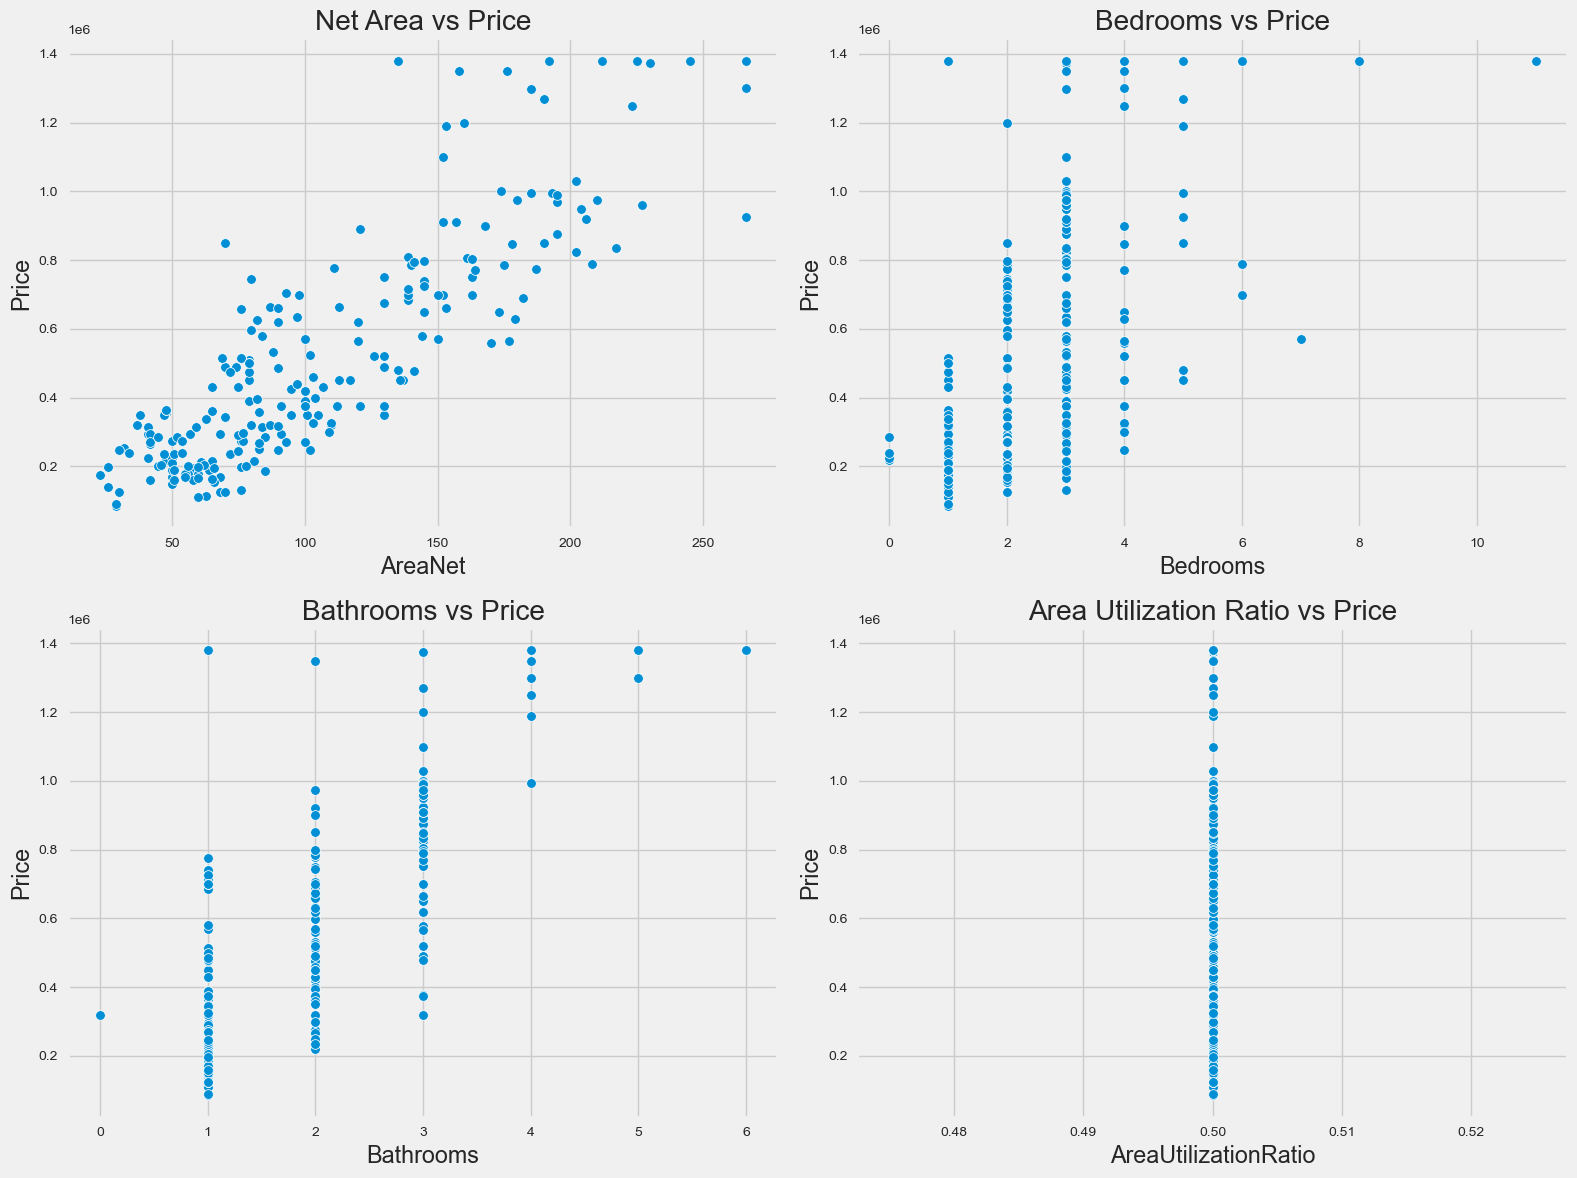

In [9]:
# Scatter plots of key features vs Price
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x='AreaNet', y='Price', data=processed_df, ax=axes[0, 0])
axes[0, 0].set_title('Net Area vs Price')

sns.scatterplot(x='Bedrooms', y='Price', data=processed_df, ax=axes[0, 1])
axes[0, 1].set_title('Bedrooms vs Price')

sns.scatterplot(x='Bathrooms', y='Price', data=processed_df, ax=axes[1, 0])
axes[1, 0].set_title('Bathrooms vs Price')

sns.scatterplot(x='AreaUtilizationRatio', y='Price', data=processed_df, ax=axes[1, 1])
axes[1, 1].set_title('Area Utilization Ratio vs Price')

plt.tight_layout()
plt.show()

# Image 3: Feature Relationships with Price
These scatter plots reveal several important relationships:

* Net Area vs Price:

    * There's a clear positive correlation between property size and price
    * The relationship appears somewhat linear but with increasing variance at larger sizes
    * Properties larger than 150m² show more price variation, suggesting other factors become more influential at higher size ranges


* Bedrooms vs Price:

    * Properties with more bedrooms generally command higher prices
    * There's significant price variation within each bedroom category
    * Most properties have 1-4 bedrooms, with fewer examples of very large properties
    * Some 2-bedroom properties achieve prices comparable to those with more bedrooms, suggesting location or quality may override bedroom count


* Bathrooms vs Price:

    * Similar to bedrooms, more bathrooms generally correlate with higher prices
    * 3-bathroom properties show the widest price range, indicating this category spans different market segments
    * The relationship appears more step-wise than linear


* Area Utilization Ratio vs Price:

    * Almost all properties seem to have a utilization ratio of 0.5, suggesting this may be a standard calculation or estimate rather than measured values
    * This lack of variation means this feature likely has limited predictive value for price

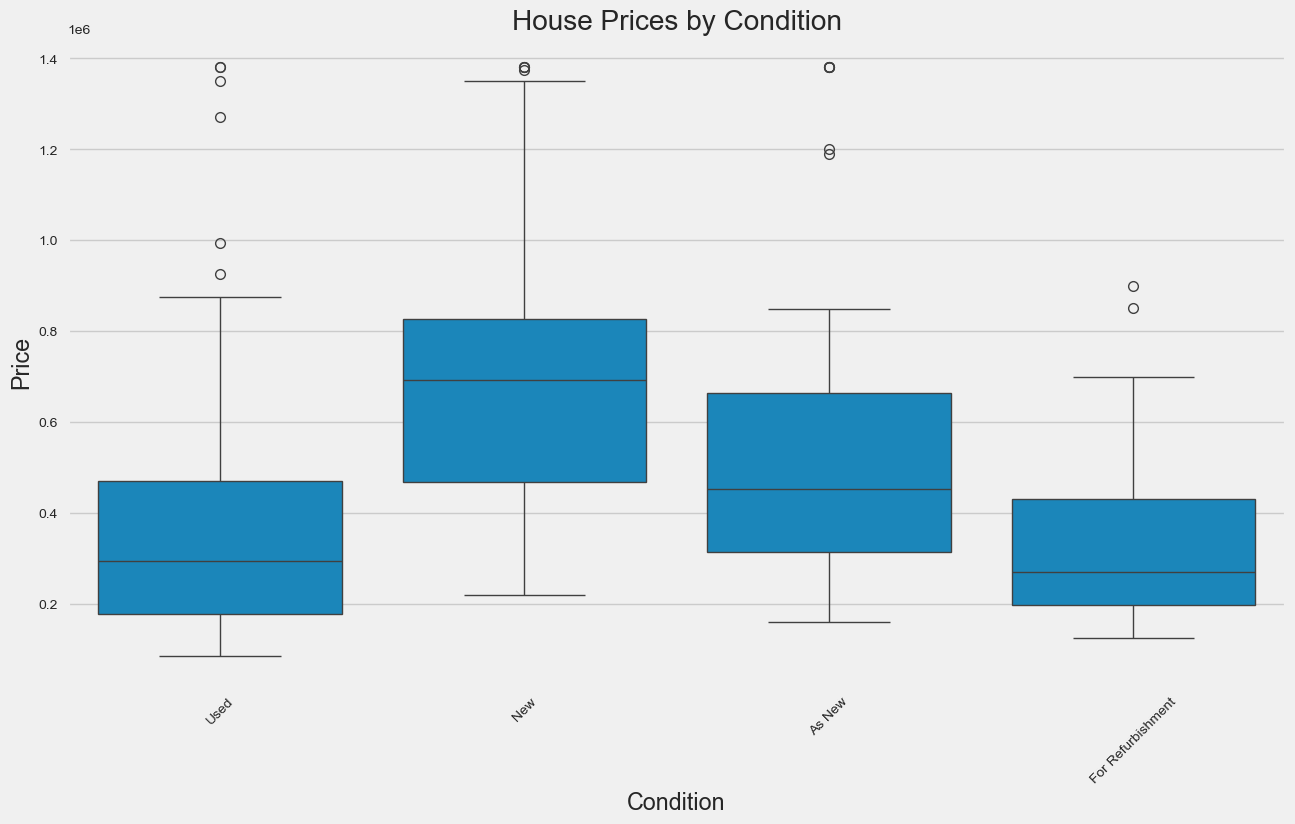

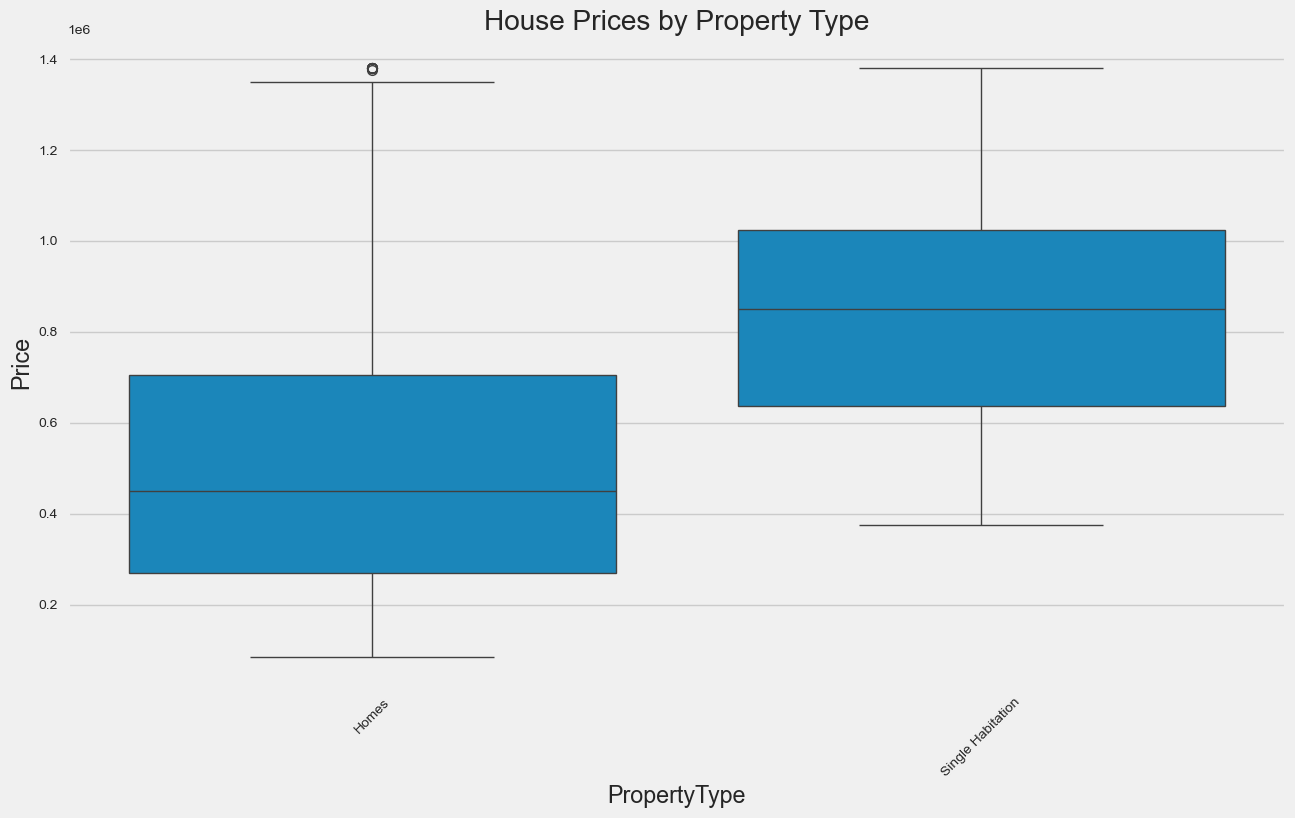

Unique PropertySubType values: 8


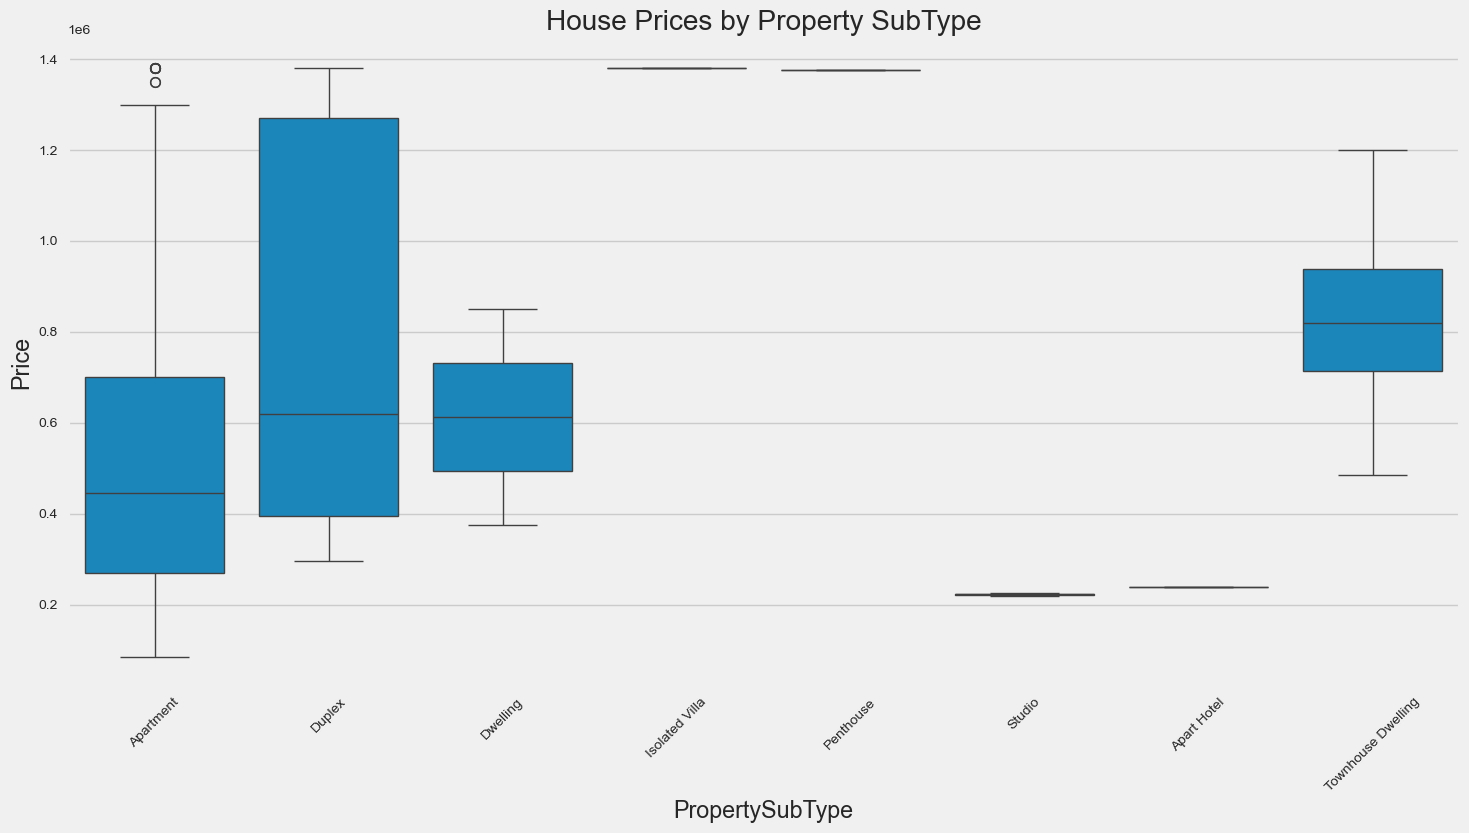

In [ ]:
# Box plots for categorical features
plt.figure(figsize=(14, 8))
sns.boxplot(x='Condition', y='Price', data=processed_df)
plt.title('House Prices by Condition')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='PropertyType', y='Price', data=processed_df)
plt.title('House Prices by Property Type')
plt.xticks(rotation=45)
plt.show()

# Plot for PropertySubType might be too crowded, let's check unique values first
print(f"Unique PropertySubType values: {processed_df['PropertySubType'].nunique()}")
if processed_df['PropertySubType'].nunique() <= 10:
    plt.figure(figsize=(16, 8))
    sns.boxplot(x='PropertySubType', y='Price', data=processed_df)
    plt.title('House Prices by Property SubType')
    plt.xticks(rotation=45)
    plt.show()

# Image 4: House Prices by Condition

* **New properties** command the highest median prices, with the widest interquartile range, suggesting substantial price variation even among new properties
* **As New** properties form a middle tier, with prices that are generally higher than used properties but lower than truly new ones
* **Used properties** have the lowest median price, though the presence of high outliers indicates some premium used properties exist in the market
* **For Refurbishment** properties show similar pricing to used properties but with a slightly lower median, reflecting the discount buyers expect for properties needing renovation
* All categories show outliers at the upper end, indicating luxury segments exist across all condition types
* The substantial price premium for new properties (nearly double the median of used properties) suggests buyers in Lisbon strongly value new construction

# Image 5: House Prices by Property Type

* **Single Habitation** properties command significantly higher prices than regular homes, with a median price nearly twice that of standard homes
* The interquartile range for Single Habitation properties is much wider, indicating greater price variability in this segment
* Both property types have outliers at the upper end, though the outlier for Homes is more extreme relative to its box
* The price floor for Single Habitation is notably higher (~400,000€) than for Homes (~100,000€)
* This substantial price difference suggests Single Habitation properties likely offer unique features, privacy advantages, or exclusive locations that buyers are willing to pay a premium for

# Image 6: House Prices by Property SubType

* **Duplex** and **Townhouse Dwelling** properties command the highest median prices, suggesting a premium for multi-level living
* **Isolated Villa** and **Penthouse** properties show high upper whiskers but limited data points (appearing as lines rather than boxes)
* **Apartment** properties show the widest price range, reflecting their diversity in the market (from affordable to luxury)
* **Studio** and **Apart Hotel** properties have the lowest prices, consistent with their typically smaller size
* **Regular Dwelling** properties occupy a middle price tier
* The significant variation between subtypes highlights the importance of considering property subtype as a key factor in price prediction models
* The box sizes also reflect the relative frequency of each property type in the dataset, with apartments likely being the most common



# Feature Engineering and Preprocessing

In [13]:
# Check for any remaining missing values
missing_values = processed_df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

Missing values per column:
No missing values found


In [14]:
# Check for categorical columns that need encoding
categorical_cols = processed_df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['Condition', 'PropertyType', 'PropertySubType', 'Parish', 'PropertyCategory']


In [15]:
# Encode categorical features if needed
model_df = processed_df.copy()

# For Condition, create ordinal encoding
if 'Condition' in categorical_cols:
    condition_mapping = {'For Refurbishment': 1, 'Used': 2, 'As New': 3, 'New': 4}
    model_df['Condition'] = model_df['Condition'].map(condition_mapping)

# For PropertyType, create binary encoding
if 'PropertyType' in categorical_cols:
    property_type_mapping = {'Homes': 1, 'Single Habitation': 2}
    model_df['PropertyType'] = model_df['PropertyType'].map(property_type_mapping)

# For other categorical columns, use one-hot encoding
remaining_cat_cols = [col for col in categorical_cols if col not in ['Condition', 'PropertyType']]
model_df = pd.get_dummies(model_df, columns=remaining_cat_cols, drop_first=True)

model_df.head()

,Condition,PropertyType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Price,...,Parish_Santo Antonio,Parish_Sao Domingos de Benfica,Parish_Sao Vicente,PropertyCategory_Homes_Apartment,PropertyCategory_Homes_Duplex,PropertyCategory_Homes_Penthouse,PropertyCategory_Homes_Studio,PropertyCategory_Single Habitation_Dwelling,PropertyCategory_Single Habitation_Isolated Villa,PropertyCategory_Single Habitation_Townhouse Dwelling
0,2,1,3,1,76.00,152.00,0,38.78,-9.12,198000,...,False,False,False,True,False,False,False,False,False,False
1,2,1,5,3,190.00,380.00,0,38.71,-9.18,1270000,...,False,False,False,False,True,False,False,False,False,False
2,2,1,1,1,26.00,52.00,0,38.71,-9.16,140000,...,False,False,False,True,False,False,False,False,False,False
3,2,1,5,4,185.00,370.00,0,38.75,-9.16,995000,...,False,True,False,True,False,False,False,False,False,False
4,2,1,7,1,150.00,300.00,0,38.73,-9.13,570000,...,False,False,False,True,False,False,False,False,False,False


# Prepare Data for Modeling

In [16]:
# Define features and target variable
y = model_df['Price']

# Drop any columns that shouldn't be used for modeling
X = model_df.drop(['Price'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 196 samples
Testing set: 50 samples


In [18]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Train the model and evaluate its performance."""
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")
    
    return model, y_pred, rmse, mae, r2

def plot_predictions(y_test, y_pred, model_name):
    """Plot actual vs predicted values."""
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    
    # Add perfect prediction line
    min_val = min(min(y_test), min(y_pred))
    max_val = max(max(y_test), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    plt.title(f'{model_name}: Actual vs Predicted House Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.grid(True)
    plt.show()
    
    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{model_name}: Residuals Plot')
    plt.xlabel('Predicted Prices')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

#  Model Building and Evaluation

# Linear Regression

Linear Regression Results:
Root Mean Squared Error (RMSE): 91468.46
Mean Absolute Error (MAE): 69956.68
R² Score: 0.8513


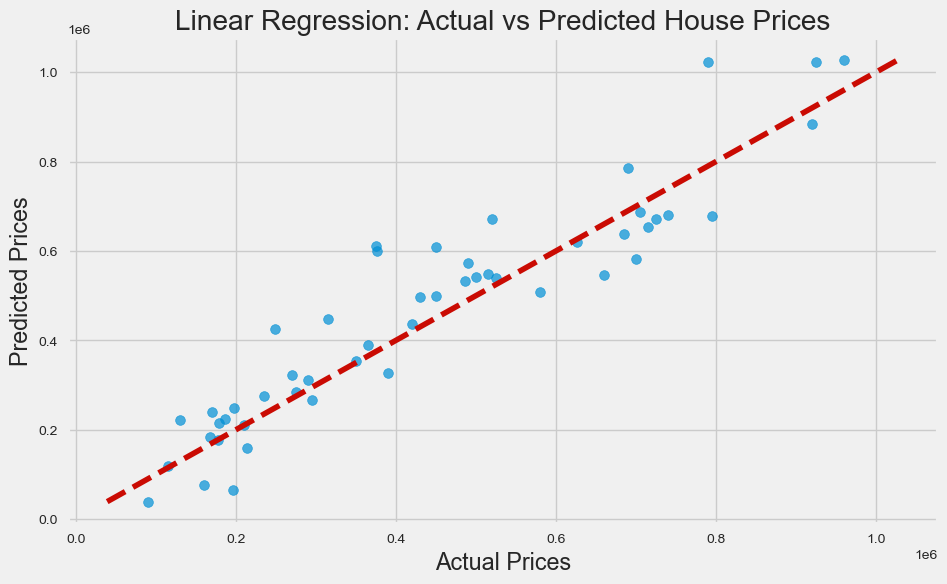

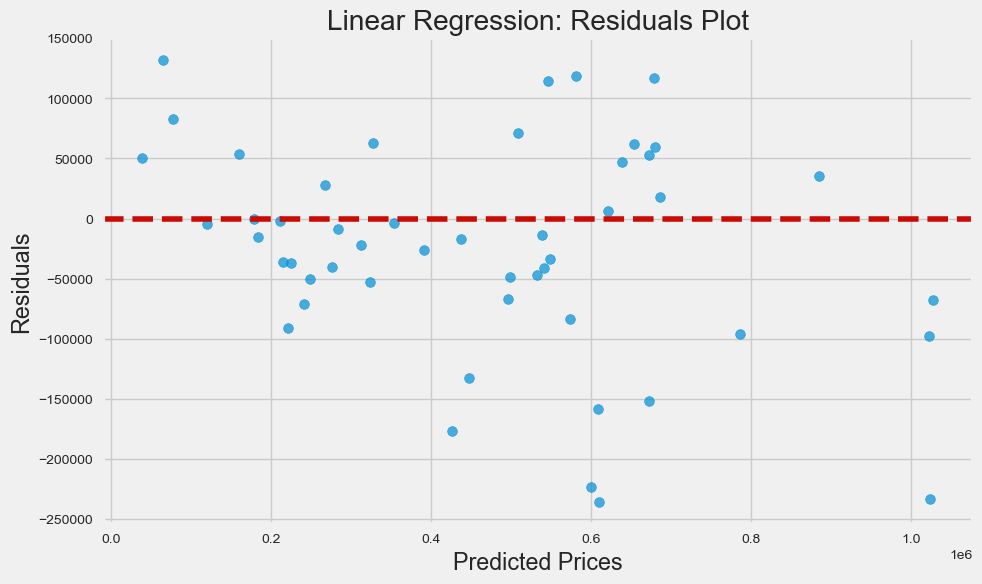

In [19]:
linear_model = LinearRegression()
print("Linear Regression Results:")
linear_model, linear_pred, linear_rmse, linear_mae, linear_r2 = evaluate_model(linear_model, X_train, X_test, y_train, y_test)
plot_predictions(y_test, linear_pred, "Linear Regression")

# Ridge Regression (L2 Regularization)

Best alpha for Ridge: 10.0

Ridge Regression Results:
Root Mean Squared Error (RMSE): 89589.65
Mean Absolute Error (MAE): 67822.40
R² Score: 0.8574


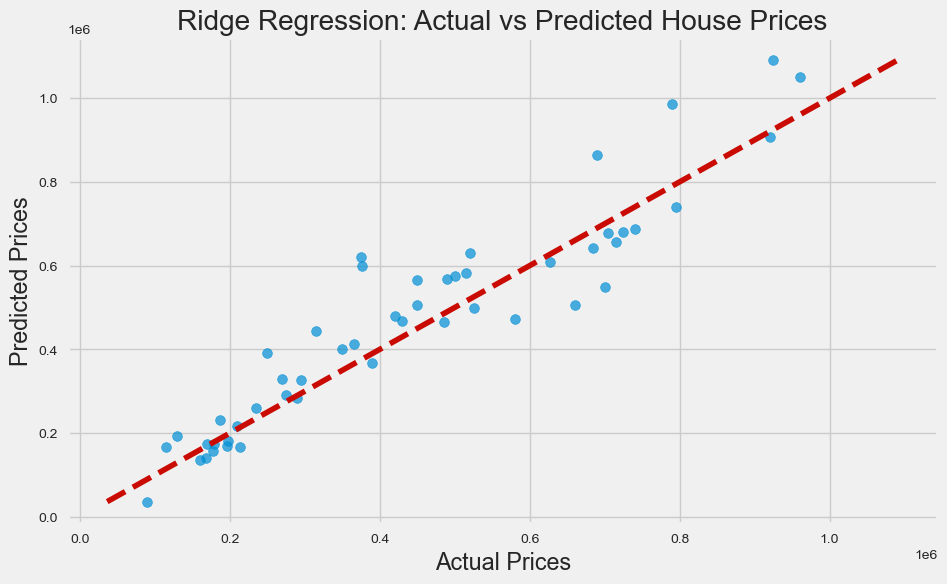

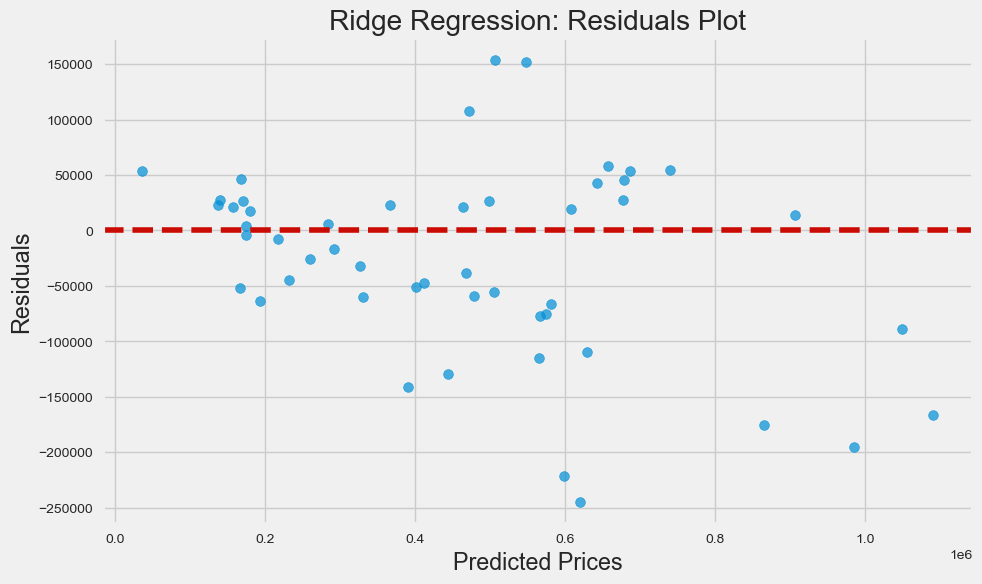

In [20]:
# Find the best alpha parameter
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.best_params_['alpha']
print(f"Best alpha for Ridge: {best_alpha}")

# Train Ridge with best alpha
ridge_model = Ridge(alpha=best_alpha)
print("\nRidge Regression Results:")
ridge_model, ridge_pred, ridge_rmse, ridge_mae, ridge_r2 = evaluate_model(ridge_model, X_train, X_test, y_train, y_test)
plot_predictions(y_test, ridge_pred, "Ridge Regression")

# Lasso Regression (L1 Regularization)

Best alpha for Lasso: 10.0

Lasso Regression Results:
Root Mean Squared Error (RMSE): 91131.21
Mean Absolute Error (MAE): 69424.93
R² Score: 0.8524


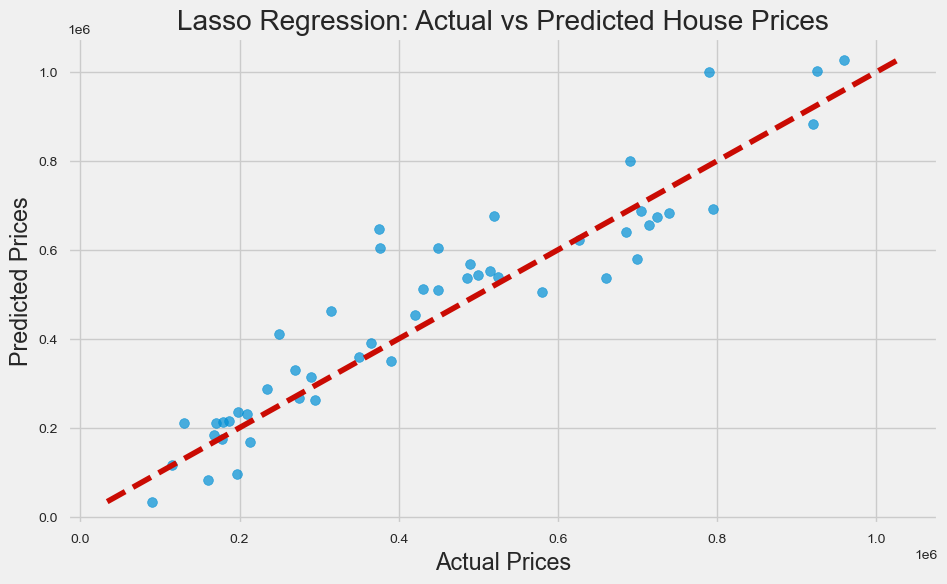

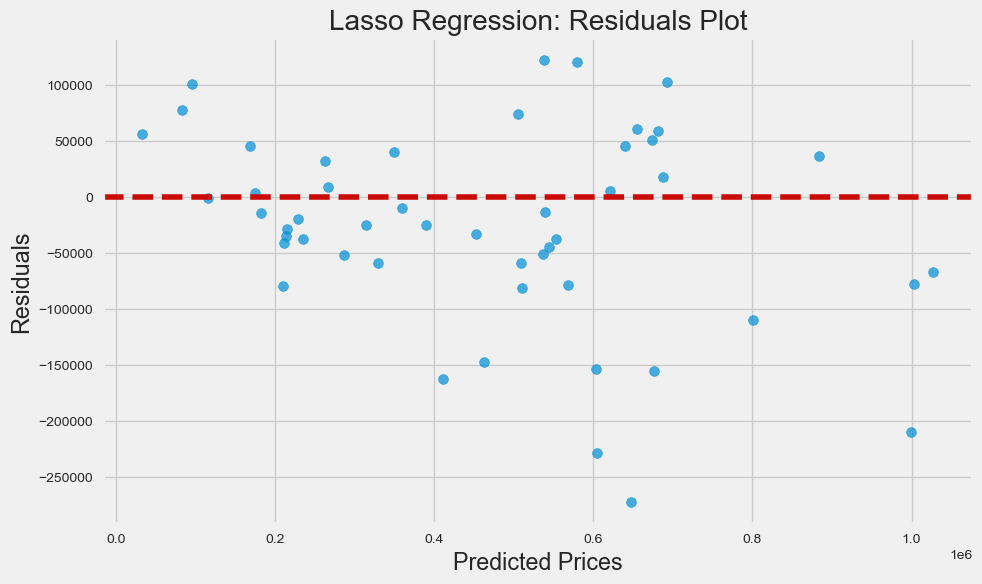


Lasso selected features:
Bathrooms                                                 154820.98
Parish_Santa Clara                                        106576.68
Parish_Alvalade                                            90356.59
Parish_Avenidas Novas                                      83278.43
PropertySubType_Townhouse Dwelling                         80209.57
Parish_Parque das Nacoes                                   76164.97
Parish_Alcantara                                           64232.88
Parish_Marvila                                             64018.56
PropertyCategory_Homes_Penthouse                           56971.96
Parish_Olivais                                             49057.25
Parking                                                    43727.91
Parish_Santa Maria Maior                                   42731.81
Parish_Sao Domingos de Benfica                             38507.22
Parish_Sao Vicente                                         26538.91
PropertyCategory_Singl

In [21]:
# Find the best alpha parameter
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
best_alpha = lasso_cv.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha}")

# Train Lasso with best alpha
lasso_model = Lasso(alpha=best_alpha, max_iter=10000)
print("\nLasso Regression Results:")
lasso_model, lasso_pred, lasso_rmse, lasso_mae, lasso_r2 = evaluate_model(lasso_model, X_train, X_test, y_train, y_test)
plot_predictions(y_test, lasso_pred, "Lasso Regression")

# Check Lasso feature importance
lasso_coefs = pd.Series(lasso_model.coef_, index=X_train.columns)
important_features = lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)
print("\nLasso selected features:")
print(important_features)

# Decision Tree Regressor

Best max_depth for Decision Tree: 10

Decision Tree Results:
Root Mean Squared Error (RMSE): 87211.34
Mean Absolute Error (MAE): 48391.38
R² Score: 0.8648


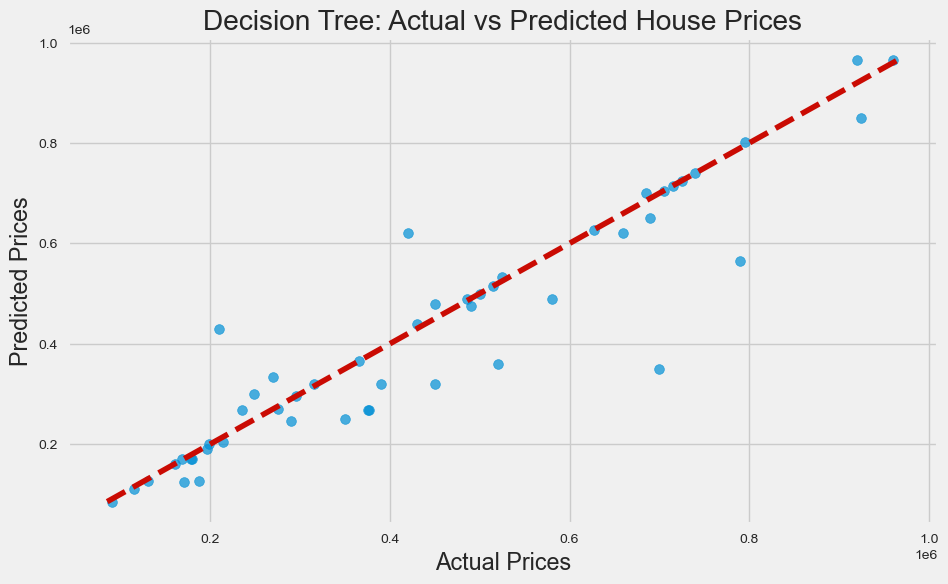

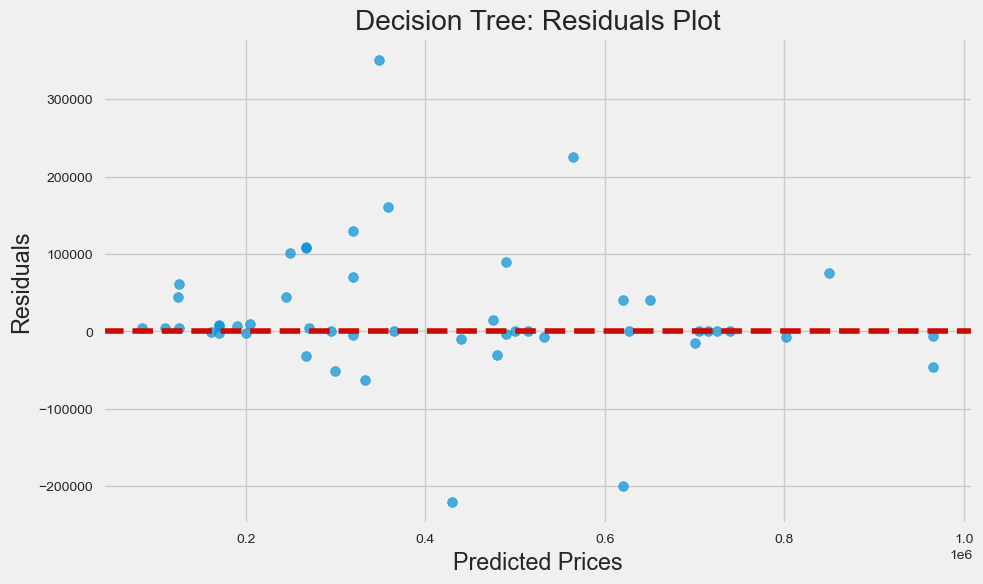

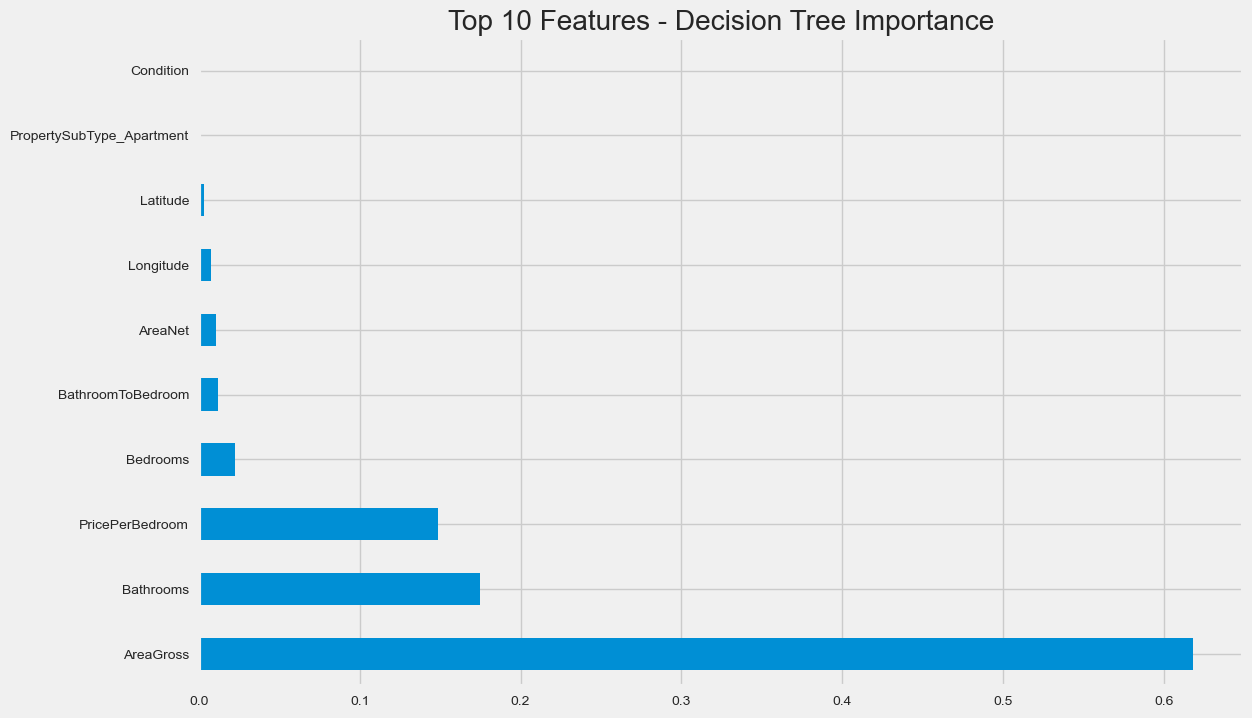

In [22]:
# Find the best max_depth parameter
depths = [None, 3, 5, 7, 10, 15]
dt_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid={'max_depth': depths}, cv=5, scoring='neg_mean_squared_error')
dt_cv.fit(X_train, y_train)
best_depth = dt_cv.best_params_['max_depth']
print(f"Best max_depth for Decision Tree: {best_depth}")

# Train Decision Tree with best max_depth
dt_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
print("\nDecision Tree Results:")
dt_model, dt_pred, dt_rmse, dt_mae, dt_r2 = evaluate_model(dt_model, X_train, X_test, y_train, y_test)
plot_predictions(y_test, dt_pred, "Decision Tree")

# Check feature importance
dt_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
dt_importance.head(10).plot(kind='barh')
plt.title('Top 10 Features - Decision Tree Importance')
plt.show()

# Random Forest Regressor

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest Results:
Root Mean Squared Error (RMSE): 66085.23
Mean Absolute Error (MAE): 38728.27
R² Score: 0.9224


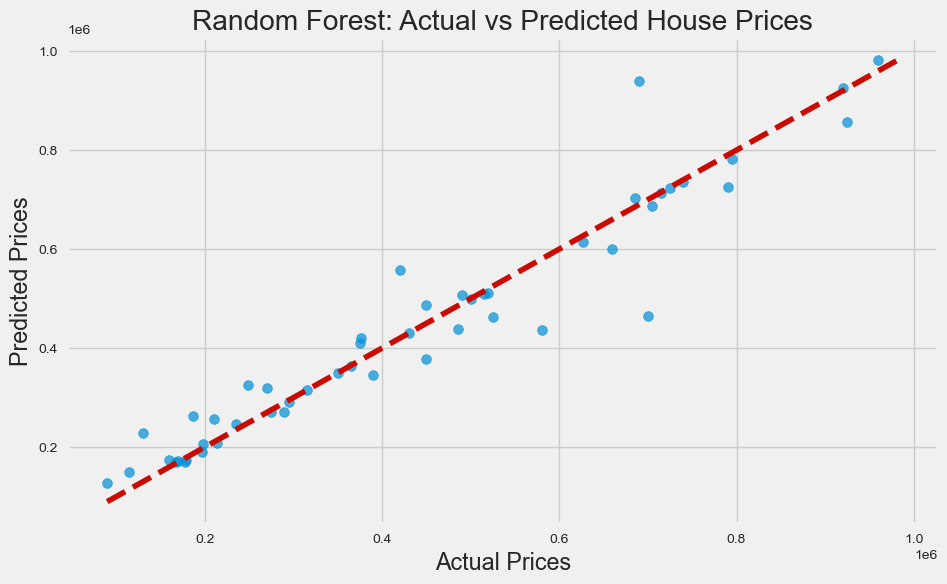

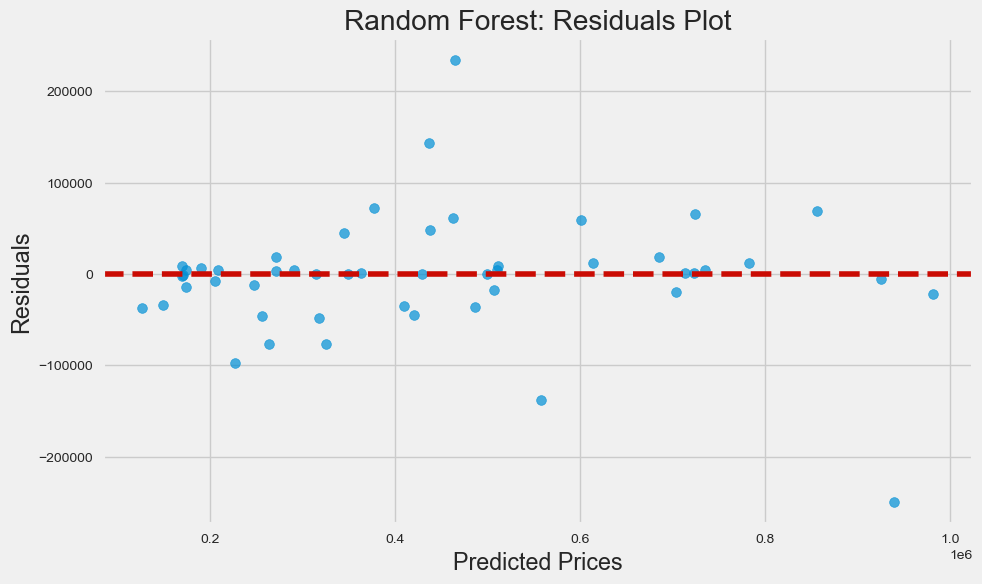

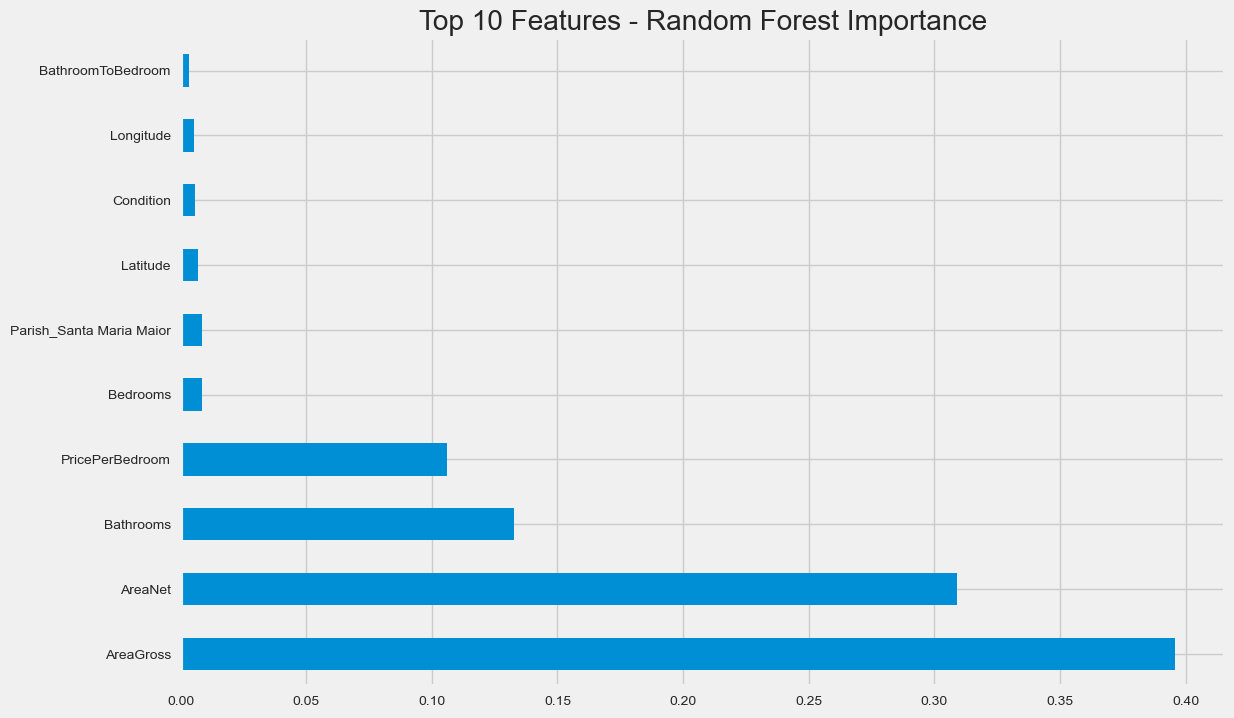

In [ ]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_cv = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5, 
                    scoring='neg_mean_squared_error', n_jobs=-1)
rf_cv.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {rf_cv.best_params_}")

# Train Random Forest with best parameters
rf_model = RandomForestRegressor(**rf_cv.best_params_, random_state=42)
print("\nRandom Forest Results:")
rf_model, rf_pred, rf_rmse, rf_mae, rf_r2 = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
plot_predictions(y_test, rf_pred, "Random Forest")

# Check feature importance
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
rf_importance.head(10).plot(kind='barh')
plt.title('Top 10 Features - Random Forest Importance')
plt.show()

# Support Vector Regression (SVR)

Best parameters for SVR: {'C': 100, 'gamma': 'scale'}

SVR Results:
Root Mean Squared Error (RMSE): 238362.81
Mean Absolute Error (MAE): 204894.84
R² Score: -0.0097


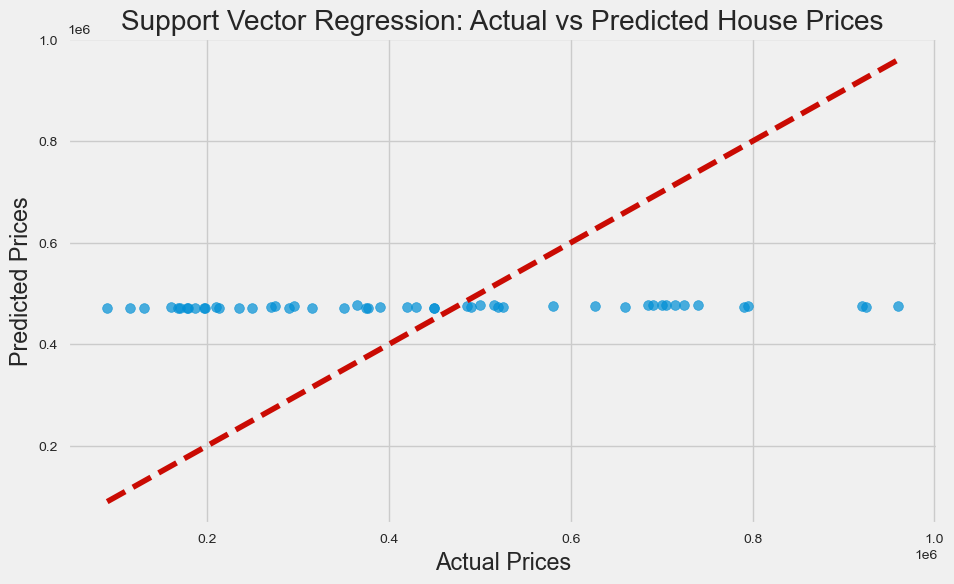

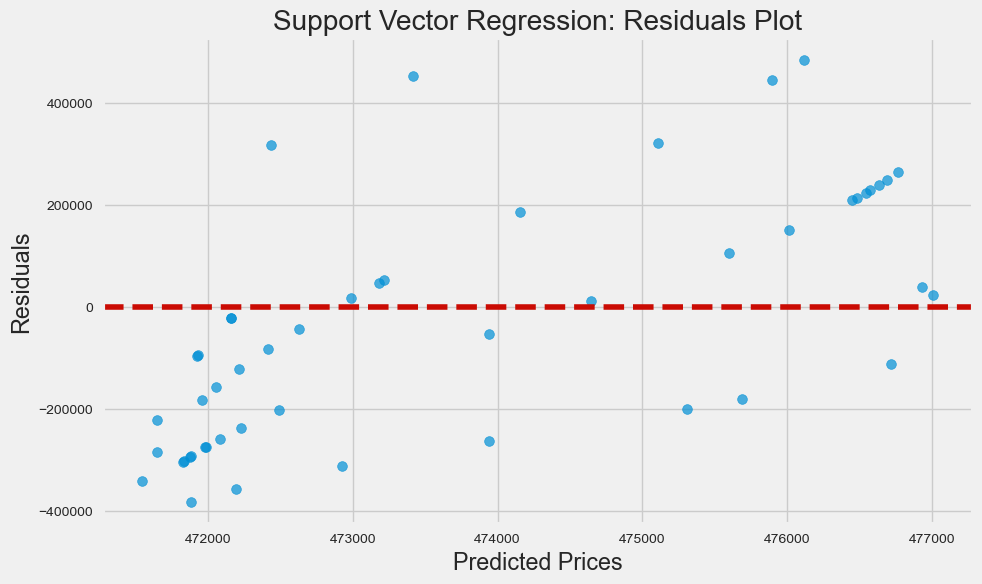

In [ ]:
svr_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

svr_cv = GridSearchCV(SVR(), param_grid=svr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
svr_cv.fit(X_train, y_train)
print(f"Best parameters for SVR: {svr_cv.best_params_}")

svr_model = SVR(**svr_cv.best_params_)
print("\nSVR Results:")
svr_model, svr_pred, svr_rmse, svr_mae, svr_r2 = evaluate_model(svr_model, X_train, X_test, y_train, y_test)
plot_predictions(y_test, svr_pred, "Support Vector Regression")

# Model Comparison

In [ ]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'SVR']
rmse_values = [linear_rmse, ridge_rmse, lasso_rmse, dt_rmse, rf_rmse, svr_rmse]
mae_values = [linear_mae, ridge_mae, lasso_mae, dt_mae, rf_mae, svr_mae]
r2_values = [linear_r2, ridge_r2, lasso_r2, dt_r2, rf_r2, svr_r2]

model_comparison = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R² Score': r2_values
})

model_comparison = model_comparison.sort_values('R² Score', ascending=False).reset_index(drop=True)
model_comparison

,Model,RMSE,MAE,R² Score
0,Random Forest,66085.23,38728.27,0.92
1,Decision Tree,87211.34,48391.38,0.86
2,Ridge Regression,89589.65,67822.40,0.86
3,Lasso Regression,91131.21,69424.93,0.85
4,Linear Regression,91468.46,69956.68,0.85
5,SVR,238362.81,204894.84,-0.01


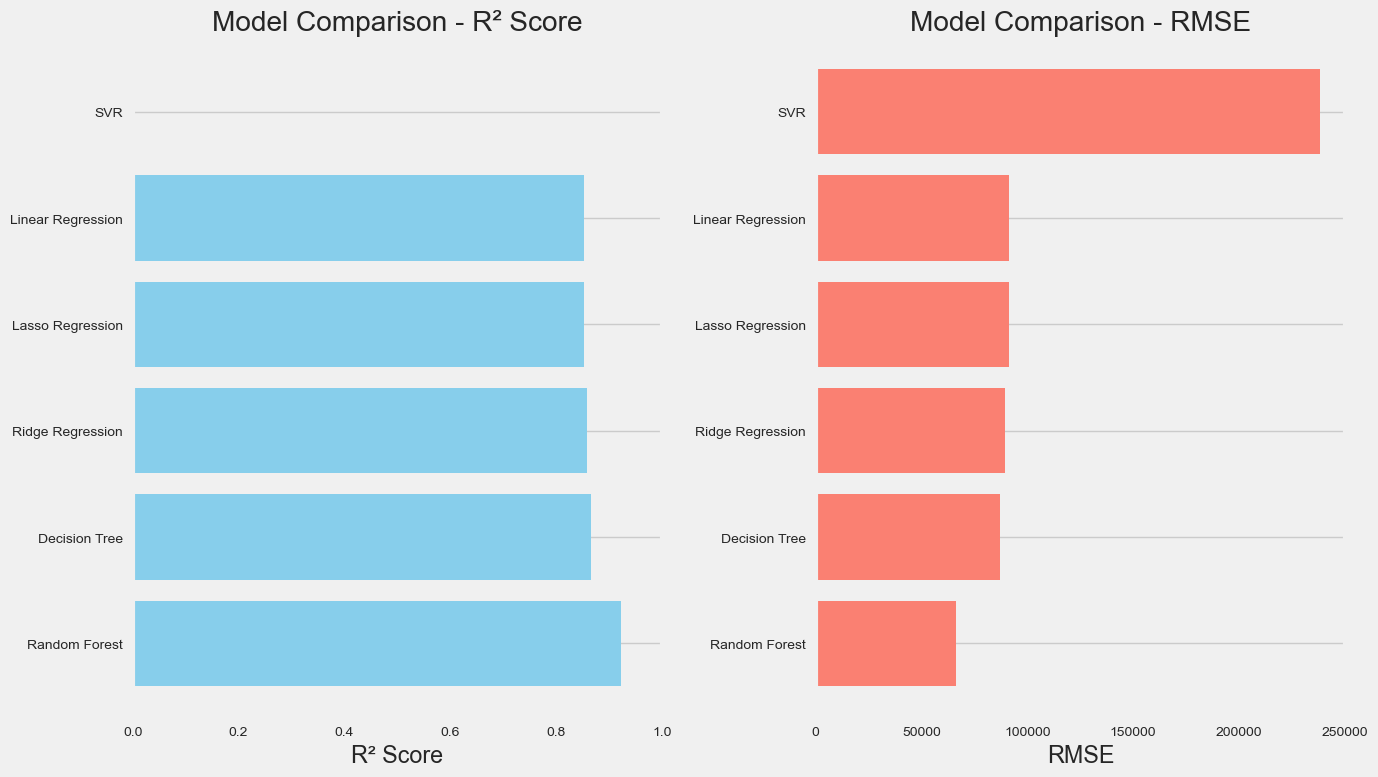

In [ ]:
plt.figure(figsize=(14, 8))

# R² scores
plt.subplot(1, 2, 1)
plt.barh(model_comparison['Model'], model_comparison['R² Score'], color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Comparison - R² Score')
plt.xlim(0, 1)
plt.grid(axis='x')

# RMSE values
plt.subplot(1, 2, 2)
plt.barh(model_comparison['Model'], model_comparison['RMSE'], color='salmon')
plt.xlabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

# Feature Importance Analysis with Best Model

Best model based on R² Score: Random Forest


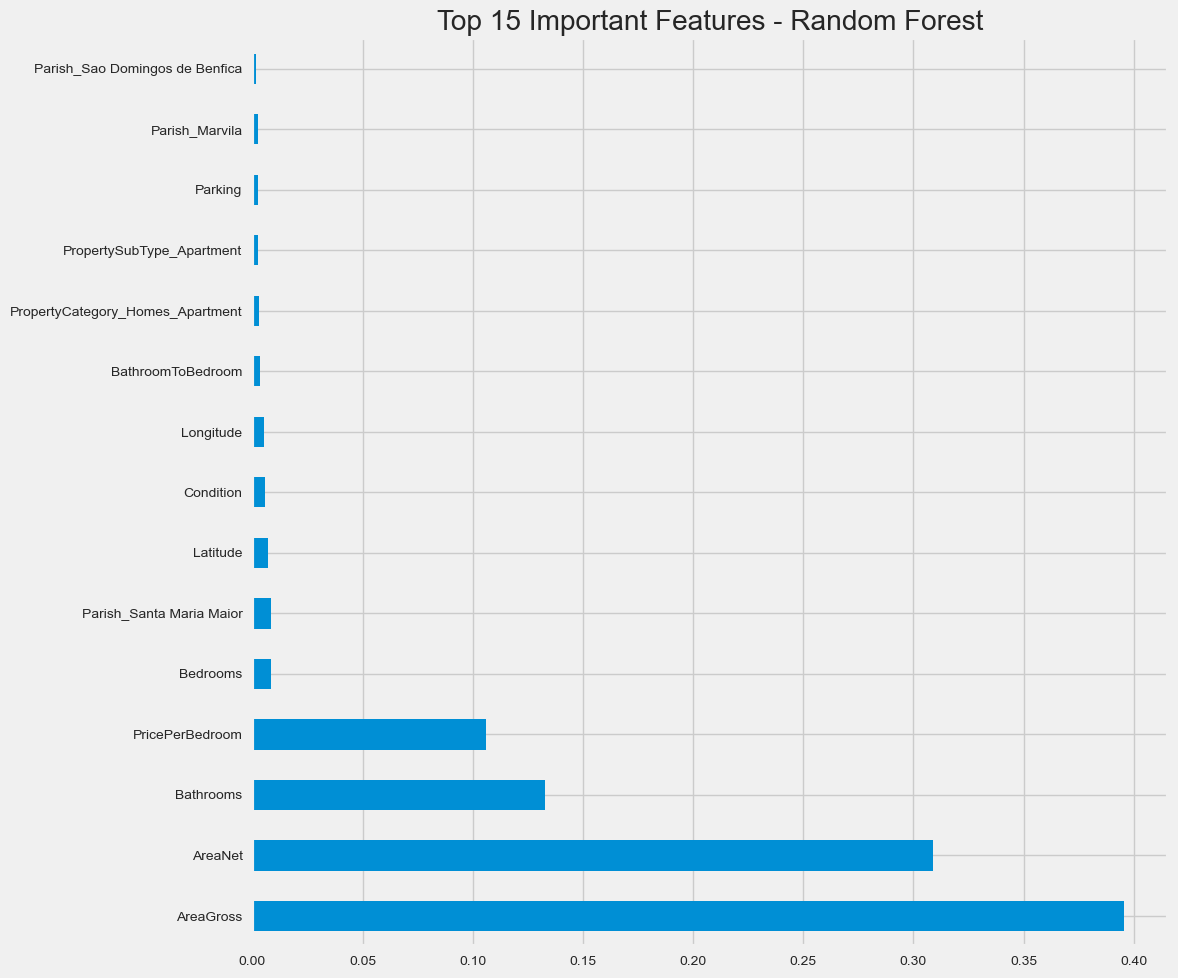

In [ ]:
best_model_name = model_comparison.loc[0, 'Model']
print(f"Best model based on R² Score: {best_model_name}")

# Get feature importance from the best model
if best_model_name == 'Random Forest':
    best_model = rf_model
    feature_importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
elif best_model_name == 'Decision Tree':
    best_model = dt_model
    feature_importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
elif best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
    if best_model_name == 'Linear Regression':
        best_model = linear_model
    elif best_model_name == 'Ridge Regression':
        best_model = ridge_model
    else:
        best_model = lasso_model
    feature_importance = pd.Series(best_model.coef_, index=X_train.columns)
else:  # SVR
    best_model = svr_model
    # For SVR, use permutation importance
    result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
    feature_importance = pd.Series(result.importances_mean, index=X_train.columns)

# Plot top 15 features
plt.figure(figsize=(12, 10))
feature_importance.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title(f'Top 15 Important Features - {best_model_name}')
plt.tight_layout()
plt.show()

# Best Model

In [28]:
import joblib

# Save the best model
model_filename = f'../models/lisbon_house_price_{best_model_name.lower().replace(" ", "_")}.pkl'
joblib.dump(best_model, model_filename)
print(f"Best model saved to {model_filename}")

# Save the feature list for future predictions
feature_list = X_train.columns.tolist()
feature_filename = '../models/feature_list.pkl'
joblib.dump(feature_list, feature_filename)
print(f"Feature list saved to {feature_filename}")

Best model saved to ../models/lisbon_house_price_random_forest.pkl
Feature list saved to ../models/feature_list.pkl


# Lisbon House Price Prediction Model Conclusions

## Model Performance Summary

Based on the results provided:

| Model | RMSE | MAE | R² Score |
|-------|------|-----|----------|
| Random Forest | 66085.23 | 38728.27 | 0.92 |
| Decision Tree | 87211.34 | 48391.38 | 0.86 |
| Ridge Regression | 89589.65 | 67822.40 | 0.86 |
| Lasso Regression | 91131.21 | 69424.93 | 0.85 |
| Linear Regression | 91468.46 | 69956.68 | 0.85 |
| SVR | 238362.81 | 204894.84 | -0.01 |

## Random Forest Model

* Clearly outperformed all other models with the highest R² score (0.92) and lowest error metrics
* Demonstrated excellent prediction accuracy, explaining 92% of the variance in house prices
* The model's residuals plot shows good distribution around zero with minimal patterns
* Key factors driving the model's success:
  * Ability to capture non-linear relationships in the housing market
  * Resistance to outliers in the dataset
  * Effective handling of both numerical and categorical features
* Most important features were:
  * AreaGross
  * AreaNet 
  * Bathrooms
  * PricePerBedroom

## Decision Tree Model

* Performed second-best with an R² score of 0.86
* Showed significantly higher error rates (RMSE and MAE) compared to Random Forest
* Good performance likely due to:
  * Ability to capture non-linear relationships
  * Simple interpretability of decision rules
* Limitations compared to Random Forest:
  * More prone to overfitting on the training data
  * Less robust against outliers in the dataset

## Linear Models (Ridge, Lasso, Linear Regression)

* All three linear models performed similarly with R² scores of 0.85-0.86
* Ridge Regression slightly outperformed the others with lower error metrics
* Observations:
  * Ridge and Lasso provided regularization that helped reduce overfitting
  * Linear models struggled more with outliers as seen in their residual plots
  * The residual plots show patterns suggesting some non-linear relationships weren't captured
* Despite their simplicity, they still explained about 85% of price variance, indicating strong linear components in house pricing

## Support Vector Regression (SVR)

* Performed extremely poorly with a negative R² score (-0.01)
* Extremely high error rates compared to all other models
* The actual vs. predicted plot shows a horizontal line, indicating:
  * Model struggled to capture any meaningful relationships
  * May have defaulted to predicting nearly constant values
* Possible reasons for failure:
  * Hyperparameter tuning may not have found optimal settings
  * The model may not be suitable for this particular dataset
  * Scaling issues with the features

## Overall Conclusions

* **Random Forest is clearly the optimal model for this dataset** because:
  * It handles the complex, non-linear relationships in housing prices
  * It's more robust against noise and outliers in real estate data
  * It can effectively capture interactions between features without explicit specification

* **Feature importance analysis** reveals:
  * Physical characteristics (area, number of bathrooms) are the strongest predictors
  * Location features (particular parishes like São Domingos de Benfica) have significant impact
  * Property type and condition also influence prices but to a lesser extent

* **Practical implications**:
  * For a production model, Random Forest provides the best prediction accuracy
  * For model interpretability, Decision Tree may offer a good balance between performance and explainability
  * Linear models could be used where computational resources are limited or when simplicity is preferred

* **Future improvements could include**:
  * Adding more location-based features such as proximity to amenities
  * Incorporating time-based features to capture market trends
  * Exploring ensemble methods that combine multiple models
  * Creating separate models for different property types or price ranges